[4.4408921e-16 4.4408921e-16 4.4408921e-16]
[4.44089210e-16 4.44089210e-16 2.22044605e-16]
[4.4408921e-16 4.4408921e-16 0.0000000e+00]
[ 4.44089210e-16  4.44089210e-16 -2.22044605e-16]
[ 4.4408921e-16  4.4408921e-16 -4.4408921e-16]
[4.44089210e-16 2.22044605e-16 4.44089210e-16]
[4.44089210e-16 2.22044605e-16 2.22044605e-16]
[4.44089210e-16 2.22044605e-16 0.00000000e+00]
[ 4.44089210e-16  2.22044605e-16 -2.22044605e-16]
[ 4.44089210e-16  2.22044605e-16 -4.44089210e-16]
[4.4408921e-16 0.0000000e+00 4.4408921e-16]
[4.44089210e-16 0.00000000e+00 2.22044605e-16]
[4.4408921e-16 0.0000000e+00 0.0000000e+00]
[ 4.44089210e-16  0.00000000e+00 -2.22044605e-16]
[ 4.4408921e-16  0.0000000e+00 -4.4408921e-16]
[ 4.44089210e-16 -2.22044605e-16  4.44089210e-16]
[ 4.44089210e-16 -2.22044605e-16  2.22044605e-16]
[ 4.44089210e-16 -2.22044605e-16  0.00000000e+00]
[ 4.44089210e-16 -2.22044605e-16 -2.22044605e-16]
[ 4.44089210e-16 -2.22044605e-16 -4.44089210e-16]
[ 4.4408921e-16 -4.4408921e-16  4.4408921e-16

In [32]:
from pathlib import Path
from utils import load_pk

path = Path('/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1')
fnames = [
    'exp_stats_one_body_d3.pk',
    'exp_stats_pair_corr_d3.pk',
    'exp_stats_mom_dist_d3.pk',
    'exp_stats_one_body.pk',
    'exp_stats_pair_corr.pk',
    'exp_stats_mom_dist.pk'
]
# for fname in fnames:
#     fnames_sub = path.glob(f'**/{fname}')
#     for fname_sub in fnames_sub:
#         exp_dir = fname_sub.parent
#         cfg_path = exp_dir / 'config1.pk'
#         rs = load_pk(cfg_path)['density_parameter']
#         dest = fname_sub.parent / (fname_sub.with_suffix('').name + f'_rs{rs}.pk')
#         if not dest.exists():
#             fname_sub.replace(dest)
#         print(f'\"{dest}\",')

for run in path.iterdir():
    fnames = run.glob('./exp_stats*')
    
    for fname in fnames:
        split = fname.__str__().split('rs')
        if len(split) == 2:
            root, rs_tmp = split
            rs = int(float(rs_tmp.replace('.pk', '')))
        else:
            root = split[0].replace('_3.pk', '_d3_')
            exp_dir = fname.parent
            cfg_path = exp_dir / 'config1.pk'
            rs = int(load_pk(cfg_path)['density_parameter'])
        dest = Path(root + f'rs{rs}.pk')
        if not dest.exists():
            fname.replace(dest)
            print(f'\"{dest}\",')



"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_one_body_d3_rs100.pk",
"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_pair_corr_d3_rs100.pk",
"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_one_body_rs100.pk",
"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_pair_corr_rs100.pk",
"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_mom_dist_rs100.pk",
"/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3

In [30]:
fname.__str__()


'/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run301115/exp_stats_mom_dist_3.pk'

In [2]:
import os 
from utils import load_pk
from plot import format_ax, format_fig, get_fig_size
import matplotlib.pyplot as plt
from typing import Iterable
import pandas as pd

def ojm(*args):
    '''
    star operator here turns it into a tuple even if single element, 
    therefore this works for just making dirs
    
    takes a path
    removes the filename if filepath 
    creates the directory if it doesn't exist 
    returns the whole path 
    '''
    path = Path(*args)
    if path.suffix != '':
        root = path.parent
    else:
        root = path
    root.mkdir(parents=True, exist_ok=True)
    return path

print('Imported')

today = '021022'
root = Path('/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1')
exp_name = '1006/100b'
n_batch = 100
n_walkers_max = 256
nd = 1
details = f'n_walkers{n_batch*n_walkers_max}_ndimension{nd}'

def load_all_data(exp_name, ):
    all_data = {}
    for path in root.iterdir():
        out_path = path / f'out/{exp_name}'
        num = max([int(str(x.name).split('_')[1]) for x in out_path.iterdir()])
        exp_path = out_path / f'out_{num}/plots/exp_stats.pk'
        cfg_path = path / 'config1.pk' 
        if exp_path.is_file():
            print('Loading ', exp_path)
            data = load_pk(exp_path)
            all_data[path.name] = {'data': load_pk(exp_path), 'cfg': load_pk(cfg_path)}
    return all_data

def load_all_data(data_files):
    all_data = {}
    for path in root.iterdir():
        cfg_path = path / 'config1.pk' 
        all_data[path.name] = {'cfg': load_pk(cfg_path)}
        for key, f in data_files.items():
            data_path = path / f
            all_data[path.name][key] = load_pk(data_path)
    return all_data

d3 = False
exp_names = {
    'one_body': f'exp_stats_one_body_d3.pk',
    'mom_dist': f'exp_stats_mom_dist_3.pk',
    'pair_corr': f'exp_stats_pair_corr_d3.pk'
}

# exp_names = {
#     'one_body': f'exp_stats_one_body.pk',
#     'mom_dist': f'exp_stats_mom_dist.pk',
#     'pair_corr': f'exp_stats_pair_corr.pk'
# }

data = load_all_data(exp_names)




Imported


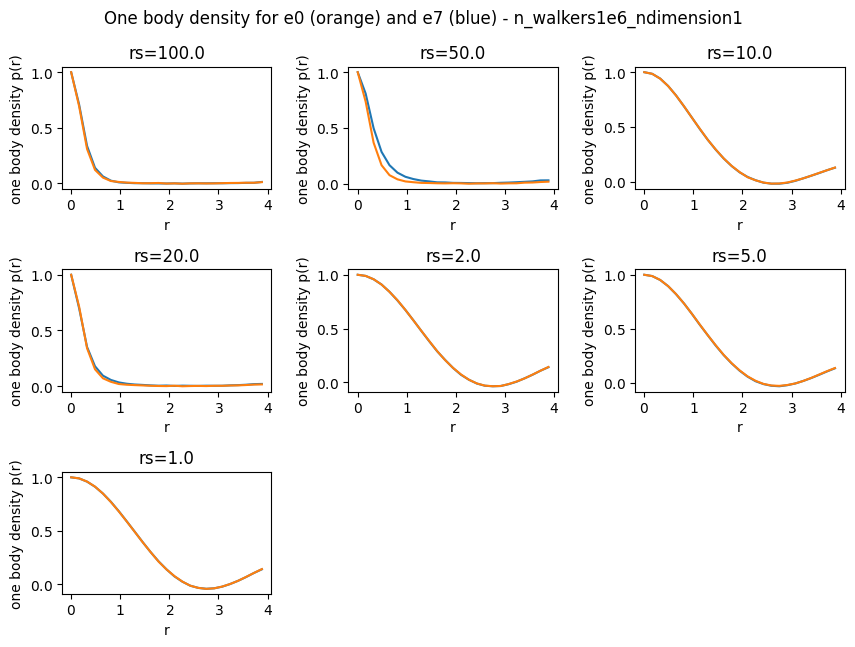

In [3]:
# One body density
plots = [['pr_x_0', 'pr_0'], ['pr_x_7', 'pr_7']]
details = f'n_walkers1e6_ndimension1'

ncols, nrows = 3, 3
figsize = get_fig_size(ncols, nrows) 
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=[x*0.8 for x in figsize])
if isinstance(axs, Iterable): 
    axs = iter(axs.flatten())

for _, exp in data.items():
    d = exp['one_body']

    ax = next(axs)
    
    for xn, yn in plots:

        ax.plot(
            d[xn],
            d[yn],
            label=yn,
        )

    format_ax(
        ax, 
        xlabel='r',
        ylabel='one body density p(r)',
        title=f'rs={exp["cfg"]["density_parameter"]}'
    )

format_fig(
    fig,
    axs,
    fig_title=f'One body density for e0 (orange) and e7 (blue) - {details}',
    fig_path=ojm(f'./results/{today}', 'one_body_density.png')
)

plt.show()

In [12]:
print(exp['pair_corr'].keys())

dict_keys(['gr_u', 'gr_d', 'gr_ud', 'rs'])


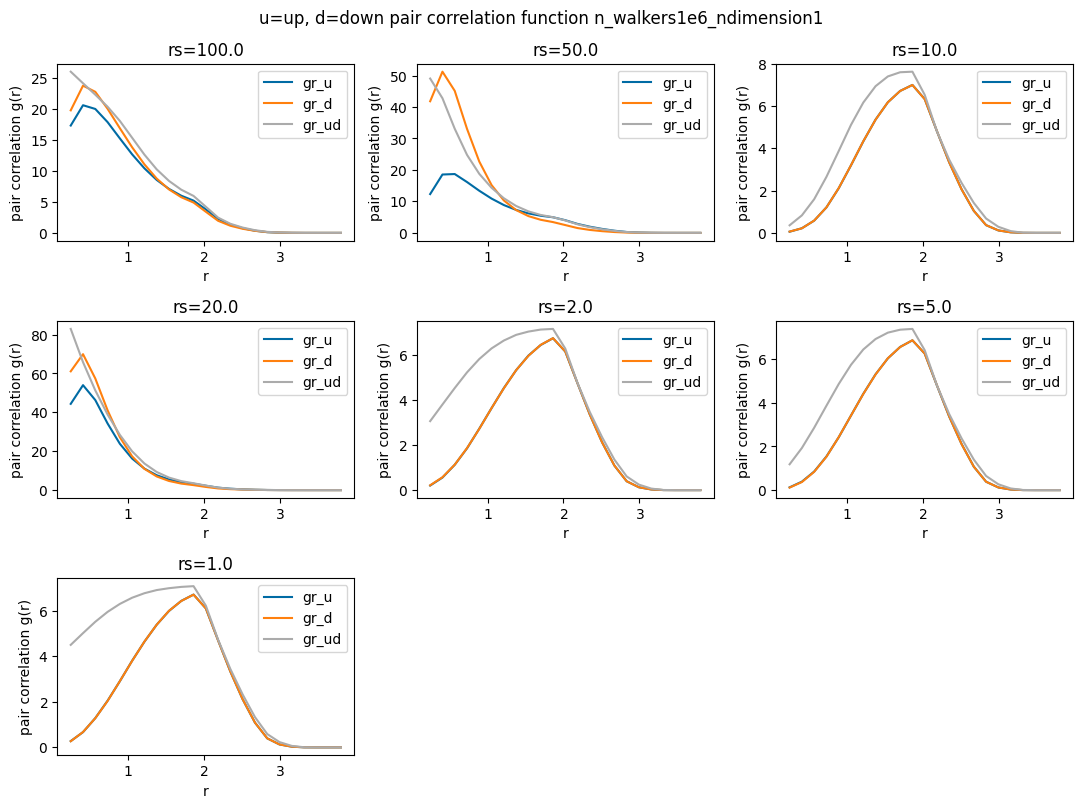

In [4]:
# Pair correlation
xns, yns = plots[1]
ncols, nrows = 3, 3
figsize = get_fig_size(ncols, nrows) 
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
if isinstance(axs, Iterable): 
    axs = iter(axs.flatten())

plots = [
    ['rs', 'gr_u'],
    ['rs', 'gr_d'], 
    ['rs', 'gr_ud']
]

cutoff = 1
for _, exp in data.items():
    d = exp['pair_corr']
    ax = next(axs)
    
    for xn, yn in plots:
        
        ax.plot(
            d[xn][cutoff:],
            d[yn][cutoff:],
            label=yn
        )
    
    format_ax(
        ax, 
        xlabel='r',
        ylabel='pair correlation g(r)',
        title=f'rs={exp["cfg"]["density_parameter"]}',
        legend=True,
    )

format_fig(
    fig,
    axs,
    fig_title=f'u=up, d=down pair correlation function {details}',
    fig_path=ojm(f'./results/{today}', 'pair_correlation.png')
)

/home/energy/amawi/miniconda3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/energy/amawi/miniconda3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/energy/amawi/miniconda3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/energy/amawi/miniconda3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/energy/amawi/miniconda3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imagi

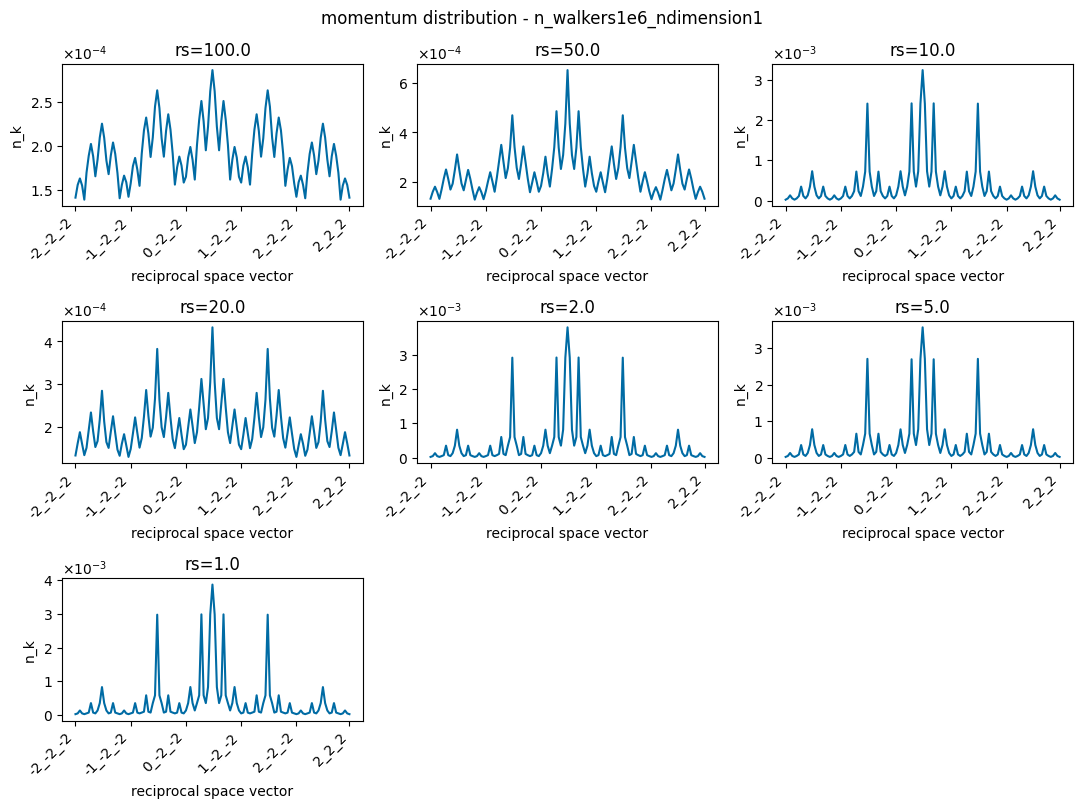

In [15]:
# Momentum distribution
import numpy as np

ncols, nrows = 3, 3
figsize = get_fig_size(ncols, nrows) 
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
if isinstance(axs, Iterable): 
    axs = iter(axs.flatten())

plots = [['mom_dist_x', 'mom_dist']]

for _, exp in data.items():
    d = exp['mom_dist']
    ax = next(axs)

    kpoints_names = np.array(['_'.join([str(i) for i in kpoint]) for kpoint in d['kpoints_int']])
    
    for xn, yn in plots:
        
        x = np.arange(0, len(kpoints_names))
        ax.plot(
            x,
            d['nk'],
            label=yn
        )
    
    n_skip = 25
    format_ax(
        ax,
        xlabel='reciprocal space vector',
        ylabel='n_k',
        xticks=np.concatenate([x[::n_skip], [x[-1]]]),
        xticklabels=np.concatenate([kpoints_names[::n_skip], [kpoints_names[-1]]]),
        title=f'rs={exp["cfg"]["density_parameter"]}',
    )


format_fig(
    fig,
    axs,
    fig_title=f'momentum distribution - {details}',
    fig_path=ojm(f'./results/{today}', 'momentum_distribution.png')
)

/home/energy/amawi/miniconda3/envs/cpu/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/energy/amawi/miniconda3/envs/cpu/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/energy/amawi/miniconda3/envs/cpu/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/energy/amawi/miniconda3/envs/cpu/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/energy/amawi/miniconda3/envs/cpu/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex value

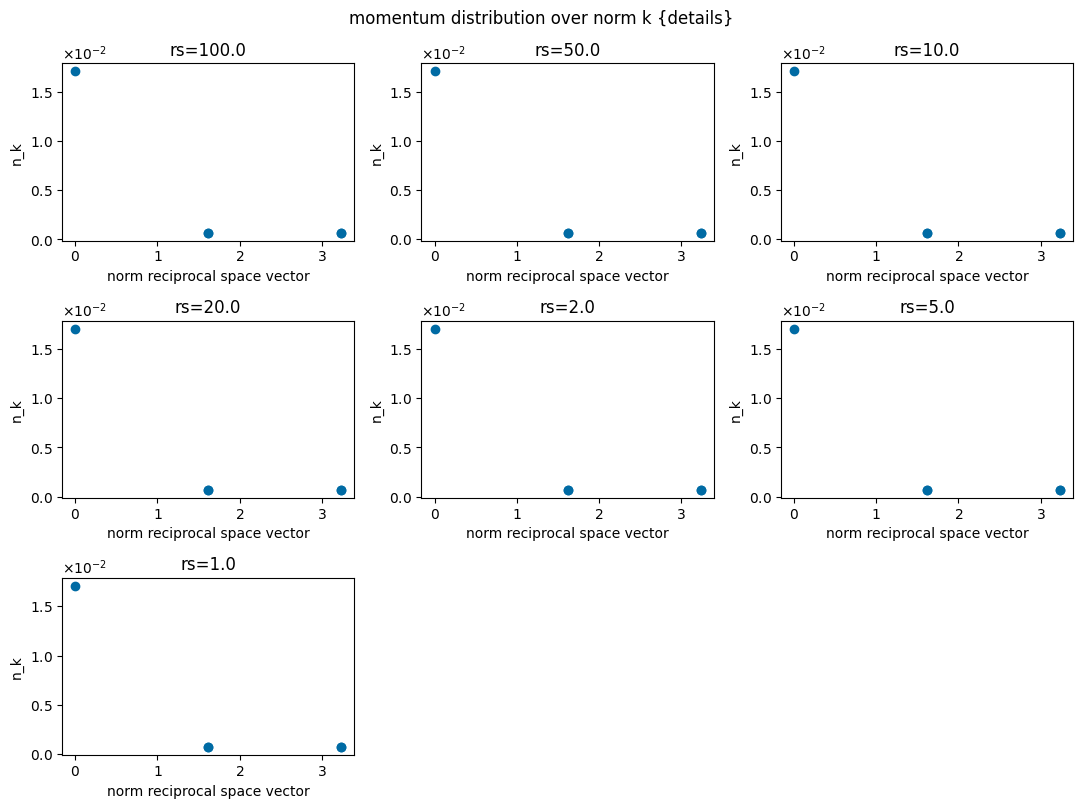

In [25]:
# Momentum distribution norm
ncols, nrows = 3, 3
figsize = get_fig_size(ncols, nrows) 
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
if isinstance(axs, Iterable): 
    axs = iter(axs.flatten())

plots = [['mom_dist_norm_x', 'mom_dist_norm']]

for _, exp in all_data.items():
    ax = next(axs)
    
    for xn, yn in plots:
        
        ax.scatter(
            exp['data'][xn],
            exp['data'][yn]
        )
    
    format_ax(
        ax,
        xlabel='norm reciprocal space vector',
        ylabel='n_k',
        title=f'rs={exp["cfg"]["density_parameter"]}',
        
    )

format_fig(
    fig,
    axs,
    fig_title='momentum distribution over norm k {details}',
    fig_path=ojm(f'./results/{today}', 'momentum_distribution_norm_k.png')
)


        


In [2]:
import os 
from pathlib import Path

from nn_ansatz.plot import plot
from nn_ansatz.utils import load_pk
from pair_correlation import compute_pair_correlation

root = '/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run41035/out'
stems = ['gr/baseline/out_4',]

for stem in stems:
    path = Path(root, stem, 'plots', 'exp_stats.pk')
    data = load_pk(path)
    print(data.keys())



dict_keys(['up_d', 'down_d', 'up_down_d', 'walkers', 'r_up_up', 'r_down_down', 'r_up_down'])


In [4]:
print(len(data['walkers']))

25600


In [2]:
# scrap 
from utils import load_pk
import numpy as np
import pandas as pd

x = load_pk('walkers_saverio_gr.pk')
idxs = np.array([i for i in range(14)])[None, :, None]
idxs = np.repeat(idxs, len(x), axis=0)
x = np.concatenate([idxs, x], axis=-1)
print(x[:2])
x = x.reshape(-1, 4)
print(x[:2])
x = pd.DataFrame(data=x, columns=['e_idx', 'x', 'y', 'z'])
x.to_csv('walkers_saverio_gr.csv')

[[[ 0.          0.87607479  1.59001076  3.77393079]
  [ 1.          1.59675395  0.13312957  0.46855152]
  [ 2.          0.49549305  3.26232028  1.57257009]
  [ 3.          1.87767291  3.81990147  0.43709219]
  [ 4.          2.57597041  2.49775171  0.63989788]
  [ 5.          1.71957171  0.25255051  0.636491  ]
  [ 6.          1.53569067  0.62654722  0.78868407]
  [ 7.          1.62093103  0.1972466   0.36475089]
  [ 8.          1.52411151  3.53630161  1.06618929]
  [ 9.          1.77173245  0.49640527  0.32611376]
  [10.          1.89458692  3.2392354   2.68183041]
  [11.          0.85769475  0.35260627  1.00058162]
  [12.          1.39342821  0.66169894  0.6005252 ]
  [13.          1.64490724  0.39693186  0.49045238]]

 [[ 0.          0.48227653  2.30368423  1.99942482]
  [ 1.          1.58748817  2.95245051  2.78138447]
  [ 2.          0.44480681  3.61076713  1.19208884]
  [ 3.          0.30033138  3.02782798  2.8249259 ]
  [ 4.          2.35270882  1.076823    0.50850326]
  [ 5.    

In [3]:
def load_summary_values(values, path):
    df = pd.read_csv(path)
    print(df[values])

summary_name = 'exp_summary.csv'
other_keys = ['n_walkers', 'n_sh', 'n_ph', 'density_parameter', 'n_layers']

In [36]:
exp_name = './experiments/HEG_PRX/bf_af_0'
summary_path = oj(exp_name, summary_name)
sweep_cfg = load_yaml(oj(exp_name, 'sweep_cfg.yaml'))
sweep_keys = list(sweep_cfg['sweep'].keys())
sweep_keys.remove('seed')

values = ['e_mean_i100000', 'e_sem_i100000'] + sweep_keys + other_keys

df = pd.read_csv(summary_path)
df[values].sort_values(by='e_mean_i100000')

,e_mean_i100000,e_sem_i100000,bf_af,n_walkers,n_sh,n_ph,density_parameter,n_layers
2,0.568976,0.000022,sin,512,32,16,1.0,2
4,0.569007,0.000021,snake,512,32,16,1.0,2
0,0.569057,0.000021,tanh,512,32,16,1.0,2
1,0.569066,0.000022,cos,512,32,16,1.0,2
5,0.569122,0.000022,no_af,512,32,16,1.0,2
3,0.569128,0.000022,silu,512,32,16,1.0,2


In [35]:
exp_name = './experiments/HEG_PRX/cusps_jastrow_0'
summarise(exp_name=exp_name)
summary_path = oj(exp_name, summary_name)
sweep_cfg = load_yaml(oj(exp_name, 'sweep_cfg.yaml'))
sweep_keys = list(sweep_cfg['sweep'].keys())
sweep_keys.remove('seed')

values = ['e_mean_i100000', 'e_sem_i100000'] + sweep_keys + other_keys

df = pd.read_csv(summary_path)
df[values].sort_values(by='e_mean_i100000')

,e_mean_i100000,e_sem_i100000,jastrow,n_walkers,n_sh,n_ph,density_parameter,n_layers
1,0.569038,0.000022,False,512,32,16,1.0,2
0,0.569067,0.000020,True,512,32,16,1.0,2


In [4]:
df = pd.read_csv('./experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run41035/e0up_e1up_cusp_stats.csv', index_col=0)
df

,Unnamed: 0,r,mean_logabspsi,mean_psi,std_psi,mean_grads_e1,mean_psi_grads_e1,drij,psip_psi
0,0,0.000001,-23.080780,1.113575e-10,5.010670e-11,793119.50,0.000051,0.000014,38.584476
1,1,0.000012,-22.237759,2.714458e-10,2.137162e-10,1054370.00,0.000051,0.000013,94.053740
2,2,0.000023,-21.744257,3.835429e-10,4.116518e-10,425614.47,0.000051,0.000012,132.894470
3,3,0.000034,-21.306374,6.030041e-10,6.082894e-10,318898.47,0.000051,0.000013,208.935990
4,4,0.000045,-21.118496,7.067090e-10,8.239027e-10,274053.30,0.000051,0.000011,244.868900
5,5,0.000056,-20.909153,8.728924e-10,9.955352e-10,193823.53,0.000051,0.000011,302.450070
6,6,0.000067,-20.696938,1.071116e-09,1.184826e-09,177729.06,0.000051,0.000012,371.132780
7,7,0.000078,-20.563652,1.224953e-09,1.393372e-09,130188.94,0.000051,0.000012,424.436160
8,8,0.000089,-20.420662,1.379634e-09,1.577392e-09,86385.80,0.000051,0.000012,478.031860
9,9,0.000100,-20.327433,1.528240e-09,1.801927e-09,94090.97,0.000051,0.000011,529.522600


In [5]:

df = pd.read_csv('./experiments/HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run41035/e0up_e7down_cusp_stats.csv', index_col=0)
df

,Unnamed: 0,r,mean_logabspsi,mean_psi,std_psi,mean_grads_e1,mean_psi_grads_e1,drij,psip_psi
0,0,0.000001,-11.049467,-0.000016,2.388792e-10,20.063780,0.000319,0.000185,1.000002
1,1,0.000012,-11.049984,-0.000016,2.167628e-09,19.991335,0.000318,0.000182,0.999485
2,2,0.000023,-11.050272,-0.000016,5.403004e-09,20.033321,0.000318,0.000184,0.999198
3,3,0.000034,-11.050527,-0.000016,6.445718e-09,20.019983,0.000318,0.000183,0.998943
4,4,0.000045,-11.050591,-0.000016,8.422400e-09,20.016207,0.000318,0.000183,0.998879
5,5,0.000056,-11.050704,-0.000016,1.201712e-08,20.124065,0.000319,0.000186,0.998766
6,6,0.000067,-11.050848,-0.000016,1.551097e-08,20.071377,0.000319,0.000184,0.998622
7,7,0.000078,-11.051078,-0.000016,1.650490e-08,20.059150,0.000318,0.000183,0.998393
8,8,0.000089,-11.051402,-0.000016,2.092184e-08,20.144392,0.000320,0.000186,0.998070
9,9,0.000100,-11.051584,-0.000016,2.093553e-08,20.097927,0.000319,0.000184,0.997888
